# Food Security Project

In [1]:
#Project overview
#We implemented a projects that provided smallholder farmers with quality farm inputs and agronomic training and information about transparent market options for their produce.
#The resources were however limited and we had to come up with a strategy of targeting the most vulnerable households.Our hypothesis was that the larger the household the more the likelihood that they will be food insecure.I came up with a decision tree and a random forest to help predict how many days in a year a household would go with less than three meals a day.

In [2]:
#Importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#importing the dataset
df = pd.read_csv('food_security.csv')
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [4]:
#exploring the data,first five rows
df.head()

,household_size,days_with_lessthan_3meals_aday
0,1,39
1,2,46
2,3,38
3,4,44
4,5,40


In [5]:
#exploring the data,last five rows
df.tail()

,household_size,days_with_lessthan_3meals_aday
5,6,57
6,7,60
7,8,54
8,9,64
9,10,57


In [6]:
#exploring the data,descriptive analysis 
df.describe()

,household_size,days_with_lessthan_3meals_aday
count,10.00000,10.00000
mean,5.50000,49.90000
std,3.02765,9.58529
min,1.00000,38.00000
25%,3.25000,41.00000
50%,5.50000,50.00000
75%,7.75000,57.00000
max,10.00000,64.00000


In [7]:
#Training the Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state =0)
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [8]:
#Predicting new results
regressor.predict([[4]])

array([44.])

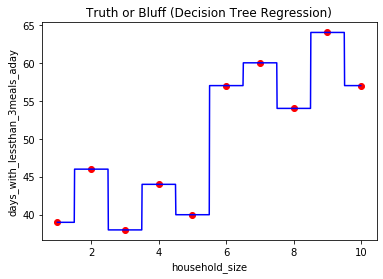

In [9]:
#Visualizing the Decision Tree Regressor 
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('household_size')
plt.ylabel('days_with_lessthan_3meals_aday')
plt.show()

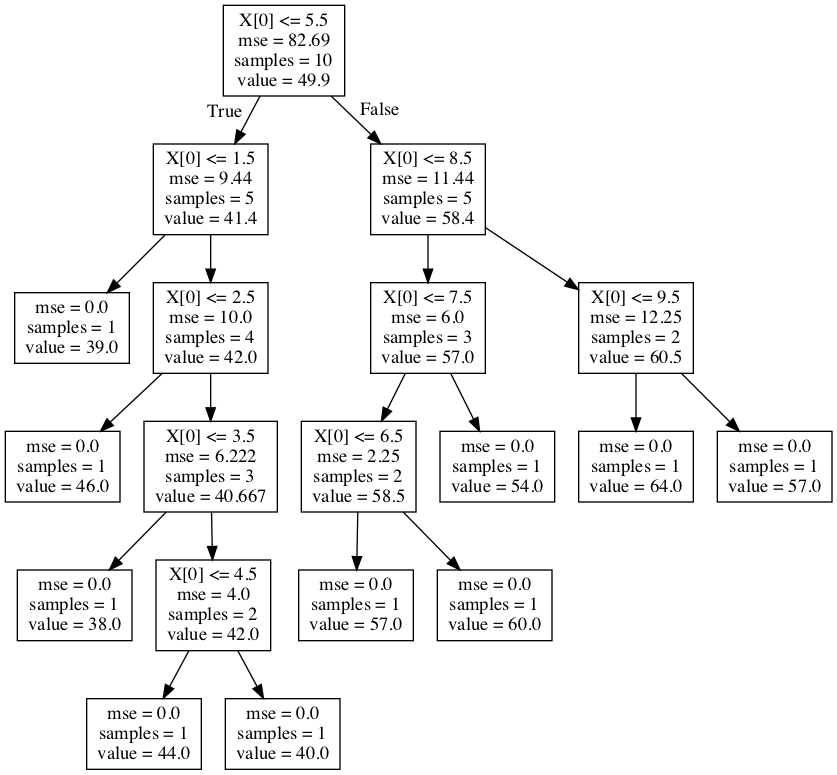

In [14]:
#importing libraries 
import graphviz 
from sklearn import tree
import pydotplus
from IPython.display import Image
#visualizing the decision tree through graphviz
dot_data = tree.export_graphviz(regressor, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())